In [1]:
import pandas as pd # package for high-performance, easy-to-use data structures and data analysis 
import numpy as np # fundamental package for scientific computing with Python
import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
from plotly.offline import init_notebook_mode, iplot,plot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import squarify
from numpy import array
from matplotlib import cm
import json
import requests
from fbprophet import Prophet

In [3]:
gurl='https://jackiezheng.github.io/2019-nCoV/Json/data.json?1581585448000'
response=requests.get(gurl)
response.encoding=response.apparent_encoding
d=response.text
daily=json.loads(d)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
G:\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



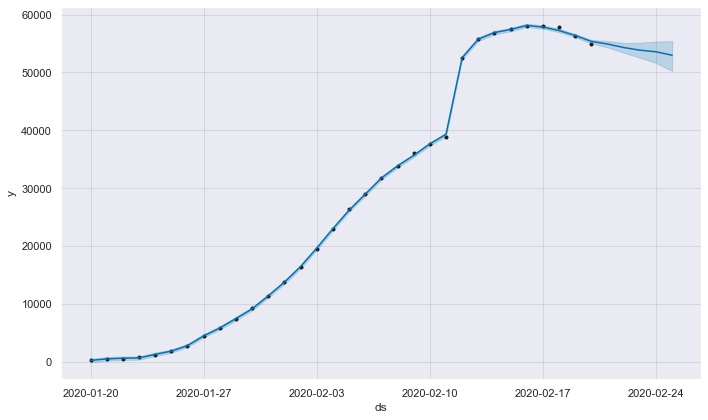

In [4]:
ds=[]
y=[]
for each in daily:
    ds.append(each['日期'].replace('/','-'))
    if each['现有确诊（含重症）']=='-':
        y.append(int(each['累计确诊'])-int(each['累计死亡'])-int(each['累计治愈']))
    else :
        y.append(int(each['现有确诊（含重症）']))
p={'ds':ds,'y':y}
dp=pd.DataFrame(p)
sns.set(font_scale=1) 
dp['ds']=pd.to_datetime(dp['ds'])
hol = pd.DataFrame({'holiday': 'hol',
                     'ds':pd.to_datetime(['2020-2-12']),
                   'lower_window':0,
                   'upper_window':3})
m = Prophet(mcmc_samples=300,changepoint_range=0.9,changepoint_prior_scale=0.2,interval_width=0.5,holidays=hol,holidays_prior_scale=25)
m.fit(dp)
future = m.make_future_dataframe(periods=5,freq='D')
forecast = m.predict(future)
fig = m.plot(forecast)
plt.show()

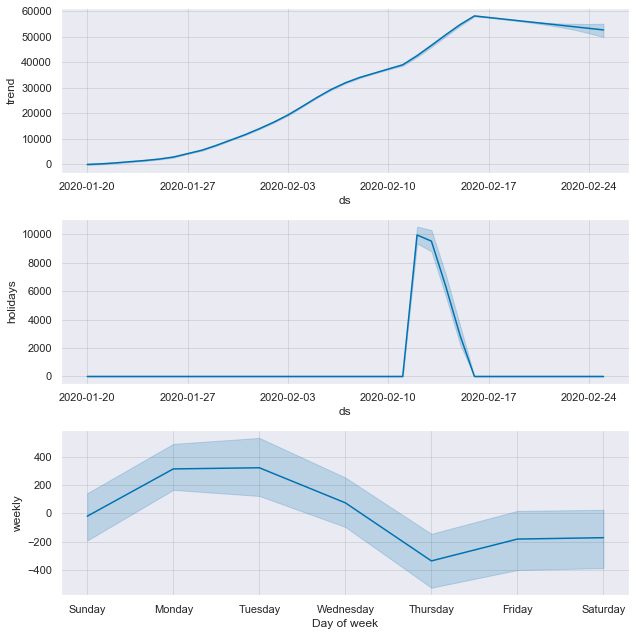

In [5]:
m.plot_components(forecast);
plt.show()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
G:\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



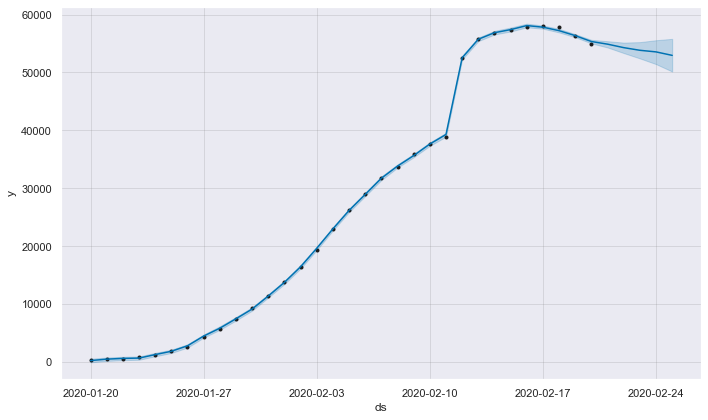

In [8]:
ds=[]
y=[]
for each in daily:
    ds.append(each['日期'].replace('/','-'))
    y.append(int(each['累计确诊']))
p={'ds':ds,'y':y}
dp=pd.DataFrame(p)
sns.set(font_scale=1) 
dp['ds']=pd.to_datetime(dp['ds'])
hol = pd.DataFrame({'holiday': 'hol',
                     'ds':pd.to_datetime(['2020-2-12']),
                   'lower_window':0,
                   'upper_window':3})
m1 = Prophet(mcmc_samples=300,changepoint_range=0.9,changepoint_prior_scale=0.1,interval_width=0.5,holidays=hol,holidays_prior_scale=15)
m1.fit(dp)
future = m.make_future_dataframe(periods=5,freq='D')
forecast1 = m.predict(future)
fig = m.plot(forecast1)
plt.show()

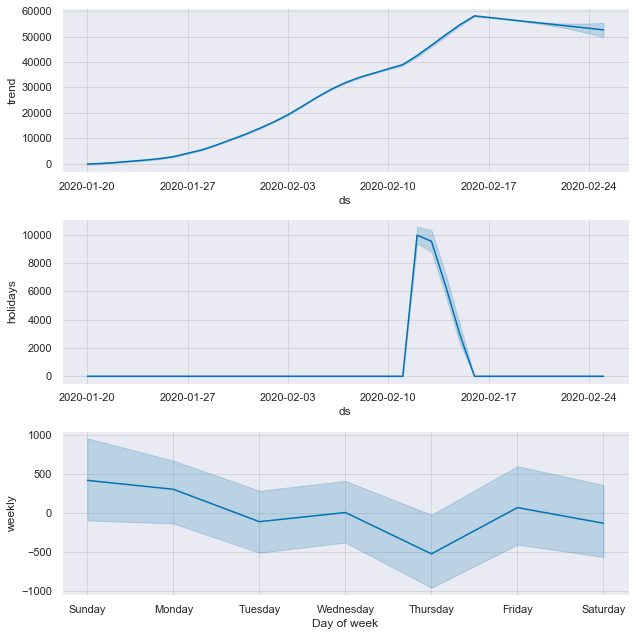

In [9]:
m1.plot_components(forecast1);
plt.show()